In [0]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits, fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
digits = load_digits()
# digits = fetch_mldata('MNIST original')
X = digits.data
y = digits.target

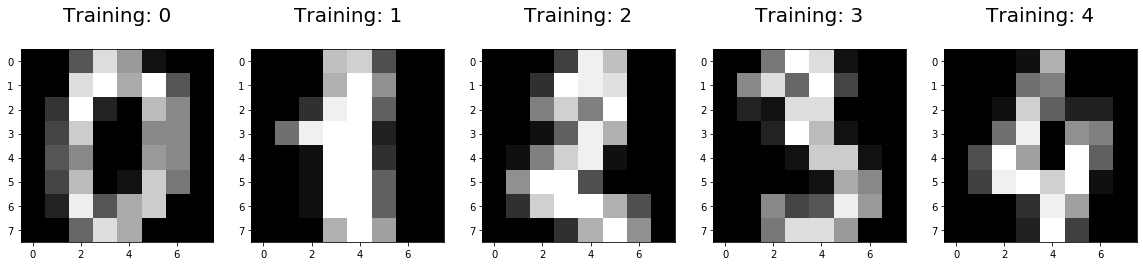

In [13]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
reg = LogisticRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
score = reg.score(X_test, y_test)
print(score)

0.9629629629629629


In [16]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[57  0  0  0  2  0  0  0  0  0]
 [ 0 46  0  0  0  1  0  0  2  0]
 [ 0  1 47  1  0  0  0  0  0  0]
 [ 0  0  0 61  0  0  0  0  3  0]
 [ 0  1  0  0 60  0  0  0  0  0]
 [ 0  1  0  0  0 44  0  0  0  2]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  1]
 [ 0  0  0  0  0  1  0  0 44  1]
 [ 0  0  0  0  0  1  0  0  2 54]]


Text(0.5, 123.82799999999995, 'Predicted label')

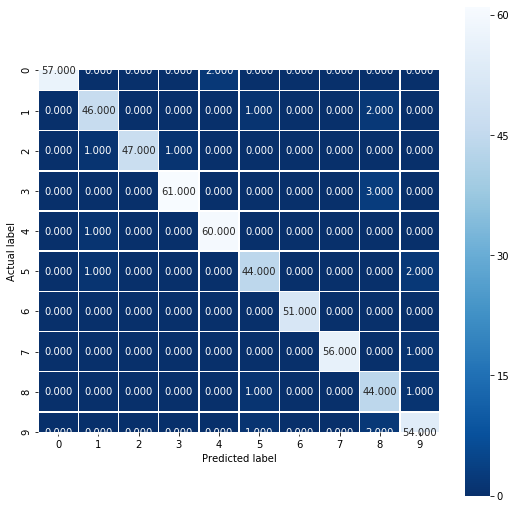

In [17]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

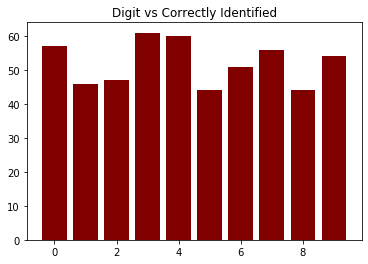

In [18]:
x_axis = [ ]
y_axis = [ ]

for counter in range(10):
  x_axis.append(counter)
  y_axis.append(confusion_matrix[counter][counter])

plt.bar( x_axis , y_axis , color = "maroon")
plt.title("Digit vs Correctly Identified") 
plt.show()



Incorrectly Identified Images -  20


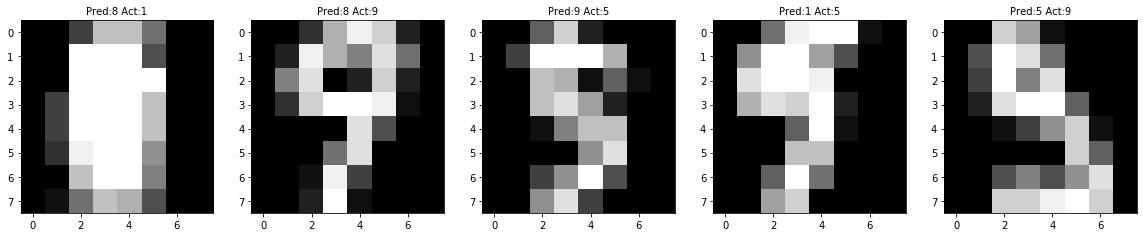

In [23]:
index = 0
incorrectIndexes = []
for label, predict in zip(y_test, y_pred):
  if label != predict: 
    incorrectIndexes.append(index)
  index +=1

print("Incorrectly Identified Images - ",str(len(incorrectIndexes)))

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(incorrectIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(X_test[badIndex], (8,8)), cmap=plt.cm.gray)
 image_title = 'Pred:'+str(y_pred[badIndex])+' Act:'+str(y_test[badIndex])
 plt.title(image_title, fontsize = 10)